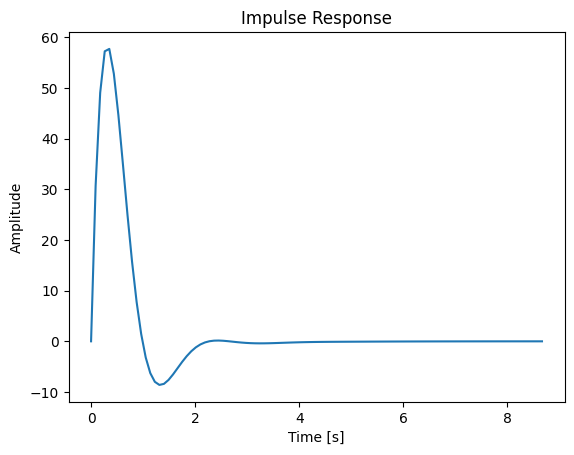

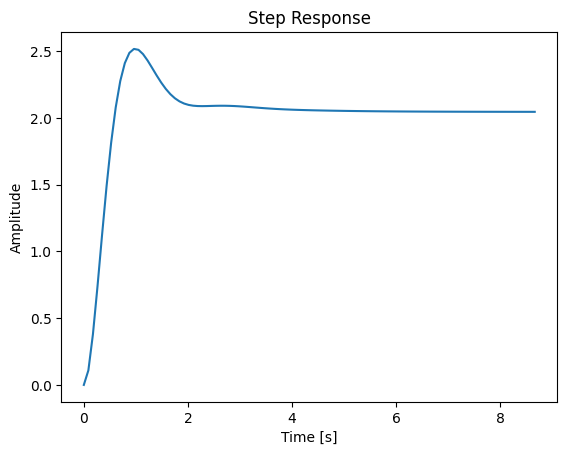

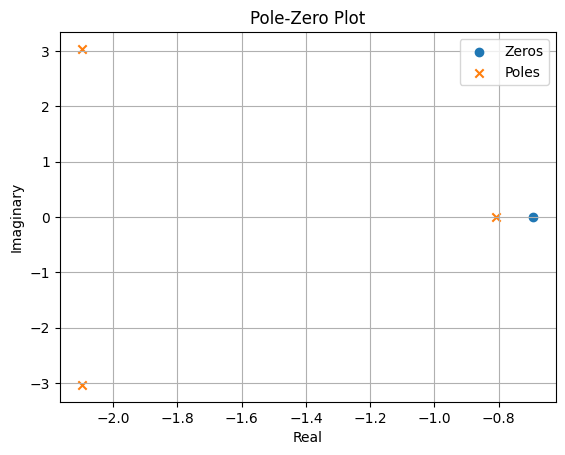

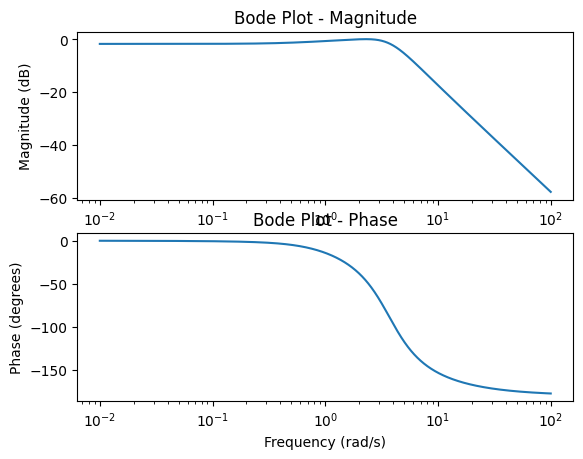

In [8]:
!pip install pyswarm
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import freqresp
from scipy.optimize import minimize
from scipy.integrate import odeint
from pyswarm import pso

# Define your system, for example, a transfer function
num = [13, 9]  # replace with your system's numerator coefficients
den = [1, 5, 17, 11]  # replace with your system's denominator coefficients
system = signal.TransferFunction(num, den)

# Impulse Response
t_impulse, imp_response = signal.impulse(system)
scaled_imp_response = 33*imp_response
plt.plot(t_impulse, scaled_imp_response)
plt.title('Impulse Response')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

# Step Response
t_step, step_response = signal.step(system)
scaled_step_response = 2.5*step_response
plt.plot(t_step, scaled_step_response)
plt.title('Step Response')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

# Pole-Zero Plot
poles, zeros = system.poles, system.zeros
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', label='Zeros')
plt.scatter(np.real(poles), np.imag(poles), marker='x', label='Poles')
plt.title('Pole-Zero Plot')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend()
plt.grid()
plt.show()

# Bode Plot
freq, response = freqresp(system)
plt.figure()
plt.subplot(2, 1, 1)
plt.semilogx(freq, 20 * np.log10(np.abs(response)))
plt.title('Bode Plot - Magnitude')
plt.ylabel('Magnitude (dB)')
plt.subplot(2, 1, 2)
plt.semilogx(freq, np.angle(response, deg=True))
plt.title('Bode Plot - Phase')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Phase (degrees)')
plt.show()

In [23]:
t = np.linspace(0, 10, 100)
def model(y,t,params):
  a3, a2, a1, b3, b2, b1 = params
  model_response = [y[1], y[2], -(a1*y[2] + a2*y[1] + a3*y[0]) +
            b1*y[2] + b2*y[1] + b3*y[0]]
  return model_response
def objective(params, t, actual_response):

    initial_conditions = [0, 0, 0]  # Initial conditions for y, y', and y''
    predicted_response = odeint(model, initial_conditions, t, args=(params,))
    difference = actual_response - predicted_response[:, 0]
    obj_value = np.sum(difference**2)
    return obj_value

In [24]:
t = np.linspace(0, 10, 100)
actual_response = odeint(model, [0, 0, 0], t, args=([1, 5, 17, 11, 13, 9],))

In [27]:
lower_bound, upper_bound = [-10]*6, [10]*6
best_params, obj_value = pso(
    objective, lower_bound, upper_bound, args=(t, actual_response[:, 0]))
print(f"Parameters:", best_params)
print(f"Objective Function Value:",obj_value)

Stopping search: maximum iterations reached --> 100
Parameters: [-6.55652067 -1.20940283  2.94226182 -4.42267809  9.11511669  0.40092646]
Objective Function Value: 0.0
